<a href="https://colab.research.google.com/github/ravichas/bioinformatics/blob/main/C11/C11_1_GeneExpr_Clustering_HC_Dentrogram_Heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# C11 Hands-on Exercise: S.Ravichandran

In [2]:
# based on Prof.Pevsner Bioinformatics Book
install.packages("rafalib")
library(rafalib)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:


z <- read.delim("https://raw.githubusercontent.com/ravichas/bioinformatics/main/data/myarraydata.txt", header = TRUE, sep="\t")


In [4]:
z

gene,chrom,DS_Cerebellum_1218,DS_Cerebellum_1389,DS_Cerebellum_1478,DS_Cerebrum_1218,DS_Cerebrum_1389,DS_Cerebrum_1478,DS_Cerebrum_847,Normal.Cerebellum.1390,Normal.Cerebellum.1411,Normal.Cerebellum.1521,Normal.Cerebrum.1390,Normal.Cerebrum.1411,Normal.Cerebrum.1521,Normal.Cerebrum.1565
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RPL41,12,9110.4,9577.9,8931.0,9384.7,9605.9,8708.4,9786.7,8945.2,10177.5,10326.8,8431.1,9077.0,9315.4,8922.3
RPL37A,2,9575.3,10103.7,9733.2,11106.4,10718.4,10641.4,10324.6,8879.1,9097.2,8892.1,13288.6,10239.1,9794.8,10308.2
TUBA6,12,10863.5,10133.2,10863.5,12806.6,10190.9,11965.6,10780.2,9766.3,9933.6,10040.2,11165.0,9647.9,11800.0,11314.6
EEF1A1,6,12785.3,12785.3,12999.8,11875.5,12761.4,12208.5,10889.9,13674.5,12998.9,13716.3,14893.6,15221.3,12312.2,11895.3
ATP5O,21,1347.2,1188.5,1340.4,1579.1,1496.3,1552.1,1555.2,792.6,925.2,850.1,991.9,910.8,799.4,913.8
C21orf33,21,479.8,427.8,509.6,498.1,440.6,472.7,554.7,305.6,371.0,361.7,283.3,258.3,318.9,305.6
WRB,21,816.4,633.7,750.3,705.4,668.2,791.2,1016.1,426.9,476.1,449.7,492.4,318.1,399.0,367.9
HRMT1L1,21,574.4,484.0,465.3,602.2,548.0,535.3,700.5,365.3,364.9,336.4,387.5,368.3,374.5,417.4


In [5]:
dim(z)
row.names(z) <- z[,1]
z

[1]  8 16

,gene,chrom,DS_Cerebellum_1218,DS_Cerebellum_1389,DS_Cerebellum_1478,DS_Cerebrum_1218,DS_Cerebrum_1389,DS_Cerebrum_1478,DS_Cerebrum_847,Normal.Cerebellum.1390,Normal.Cerebellum.1411,Normal.Cerebellum.1521,Normal.Cerebrum.1390,Normal.Cerebrum.1411,Normal.Cerebrum.1521,Normal.Cerebrum.1565
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RPL41,RPL41,12,9110.4,9577.9,8931.0,9384.7,9605.9,8708.4,9786.7,8945.2,10177.5,10326.8,8431.1,9077.0,9315.4,8922.3
RPL37A,RPL37A,2,9575.3,10103.7,9733.2,11106.4,10718.4,10641.4,10324.6,8879.1,9097.2,8892.1,13288.6,10239.1,9794.8,10308.2
TUBA6,TUBA6,12,10863.5,10133.2,10863.5,12806.6,10190.9,11965.6,10780.2,9766.3,9933.6,10040.2,11165.0,9647.9,11800.0,11314.6
EEF1A1,EEF1A1,6,12785.3,12785.3,12999.8,11875.5,12761.4,12208.5,10889.9,13674.5,12998.9,13716.3,14893.6,15221.3,12312.2,11895.3
ATP5O,ATP5O,21,1347.2,1188.5,1340.4,1579.1,1496.3,1552.1,1555.2,792.6,925.2,850.1,991.9,910.8,799.4,913.8
C21orf33,C21orf33,21,479.8,427.8,509.6,498.1,440.6,472.7,554.7,305.6,371.0,361.7,283.3,258.3,318.9,305.6
WRB,WRB,21,816.4,633.7,750.3,705.4,668.2,791.2,1016.1,426.9,476.1,449.7,492.4,318.1,399.0,367.9
HRMT1L1,HRMT1L1,21,574.4,484.0,465.3,602.2,548.0,535.3,700.5,365.3,364.9,336.4,387.5,368.3,374.5,417.4



In genomics often cluster the data to discover groups
Also, remember that genomics data is a high-D data.
To cluster the data, we need to compute distance
we need to understand the concept of distance.

create a distance matrix using cols 3 to 16
perform a hierarchical clustering using the complete linkage
agglomeration method

HC follows either a top-down (divisive) or agglomerative (bottom-up)
approaches top-down, we take all the samples and divide them into two
(not necessarily equally) and then divide them up into two
until there are no more samples to divide


Call:
hclust(d = dist(z[, 3:16]), method = "complete")

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 8 


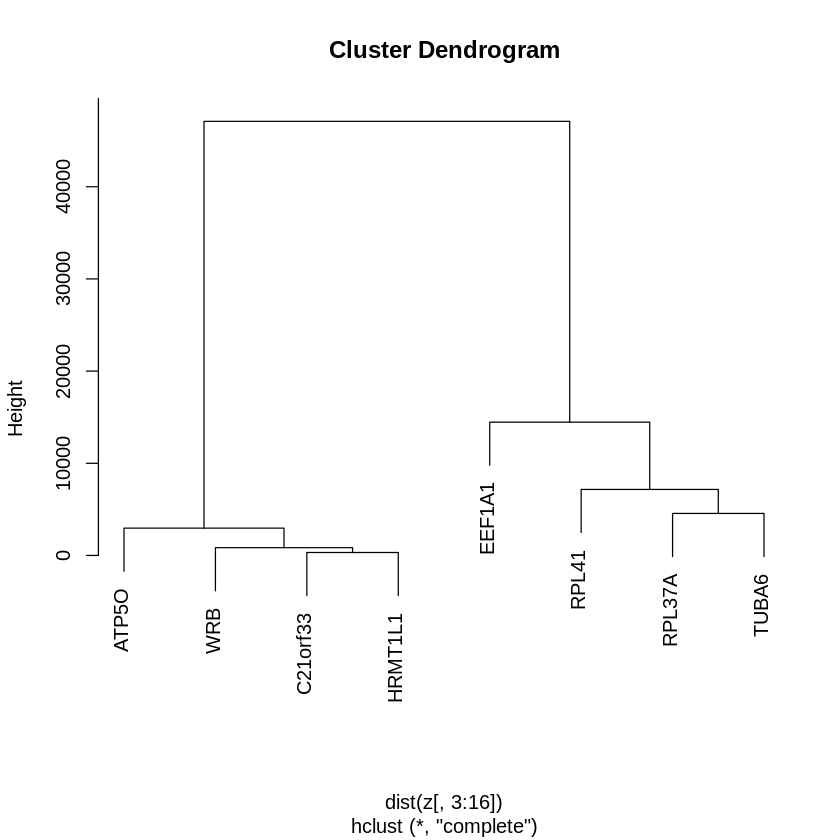

In [6]:
clust <- hclust(dist(z[,3:16]),method="complete")
clust

plot(clust)

it generates a clustering tree
you can also repeat using methods="single" or "median"
`?hclust` for more options

create a version of matrix called z.back in which 2 columns
containing the gene names and chromosomal loci are removed

In [7]:
z.back=z[,-c(1,2)]

z.back

# create a new file called w by transposing z.back

w <- t(z.back)

w

,DS_Cerebellum_1218,DS_Cerebellum_1389,DS_Cerebellum_1478,DS_Cerebrum_1218,DS_Cerebrum_1389,DS_Cerebrum_1478,DS_Cerebrum_847,Normal.Cerebellum.1390,Normal.Cerebellum.1411,Normal.Cerebellum.1521,Normal.Cerebrum.1390,Normal.Cerebrum.1411,Normal.Cerebrum.1521,Normal.Cerebrum.1565
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RPL41,9110.4,9577.9,8931.0,9384.7,9605.9,8708.4,9786.7,8945.2,10177.5,10326.8,8431.1,9077.0,9315.4,8922.3
RPL37A,9575.3,10103.7,9733.2,11106.4,10718.4,10641.4,10324.6,8879.1,9097.2,8892.1,13288.6,10239.1,9794.8,10308.2
TUBA6,10863.5,10133.2,10863.5,12806.6,10190.9,11965.6,10780.2,9766.3,9933.6,10040.2,11165.0,9647.9,11800.0,11314.6
EEF1A1,12785.3,12785.3,12999.8,11875.5,12761.4,12208.5,10889.9,13674.5,12998.9,13716.3,14893.6,15221.3,12312.2,11895.3
ATP5O,1347.2,1188.5,1340.4,1579.1,1496.3,1552.1,1555.2,792.6,925.2,850.1,991.9,910.8,799.4,913.8
C21orf33,479.8,427.8,509.6,498.1,440.6,472.7,554.7,305.6,371.0,361.7,283.3,258.3,318.9,305.6
WRB,816.4,633.7,750.3,705.4,668.2,791.2,1016.1,426.9,476.1,449.7,492.4,318.1,399.0,367.9
HRMT1L1,574.4,484.0,465.3,602.2,548.0,535.3,700.5,365.3,364.9,336.4,387.5,368.3,374.5,417.4


,RPL41,RPL37A,TUBA6,EEF1A1,ATP5O,C21orf33,WRB,HRMT1L1
DS_Cerebellum_1218,9110.4,9575.3,10863.5,12785.3,1347.2,479.8,816.4,574.4
DS_Cerebellum_1389,9577.9,10103.7,10133.2,12785.3,1188.5,427.8,633.7,484.0
DS_Cerebellum_1478,8931.0,9733.2,10863.5,12999.8,1340.4,509.6,750.3,465.3
DS_Cerebrum_1218,9384.7,11106.4,12806.6,11875.5,1579.1,498.1,705.4,602.2
DS_Cerebrum_1389,9605.9,10718.4,10190.9,12761.4,1496.3,440.6,668.2,548.0
DS_Cerebrum_1478,8708.4,10641.4,11965.6,12208.5,1552.1,472.7,791.2,535.3
DS_Cerebrum_847,9786.7,10324.6,10780.2,10889.9,1555.2,554.7,1016.1,700.5
Normal.Cerebellum.1390,8945.2,8879.1,9766.3,13674.5,792.6,305.6,426.9,365.3
Normal.Cerebellum.1411,10177.5,9097.2,9933.6,12998.9,925.2,371.0,476.1,364.9
Normal.Cerebellum.1521,10326.8,8892.1,10040.2,13716.3,850.1,361.7,449.7,336.4



Call:
hclust(d = dist(w[, 1:8]))

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 14 


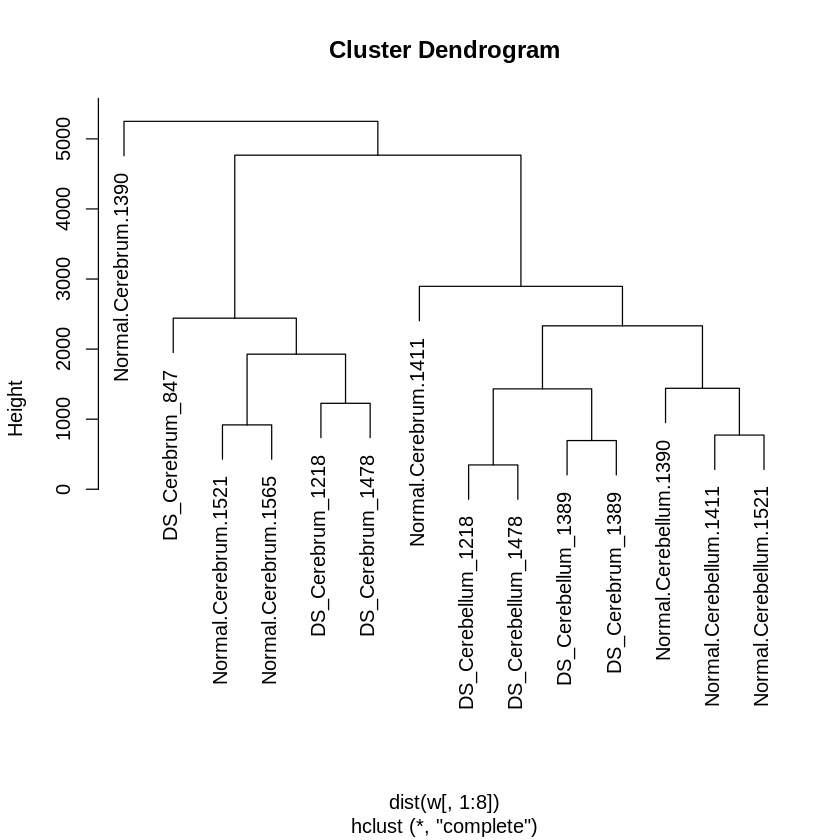

In [8]:
clust <- hclust(dist(w[,1:8]))
clust
plot(clust)

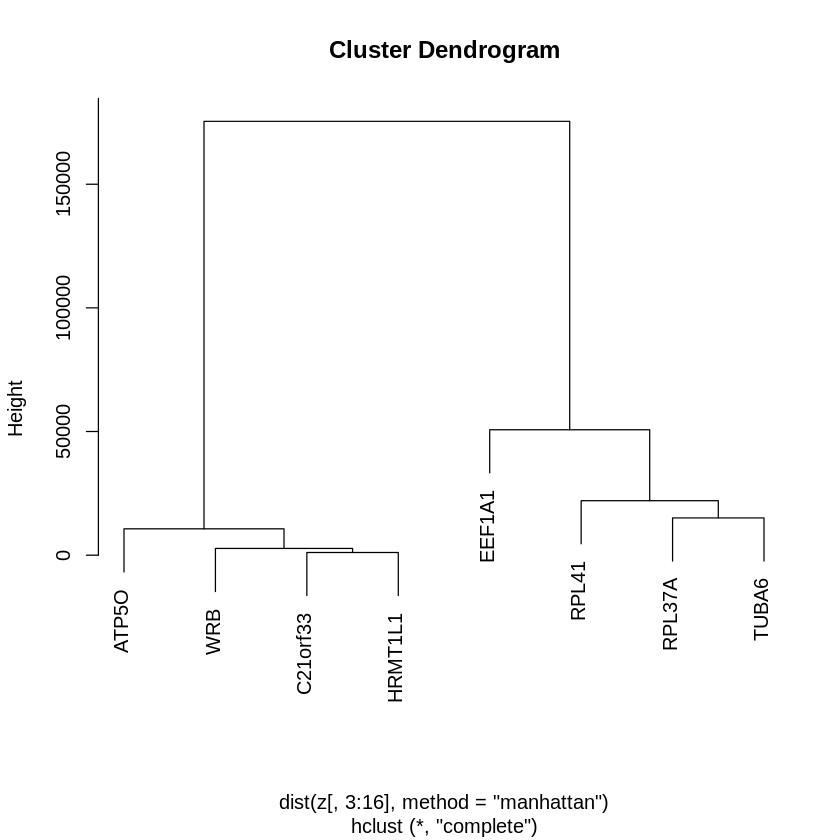

In [9]:
clust <- hclust(dist(z[,3:16],method="manhattan"),method="complete")
plot(clust)

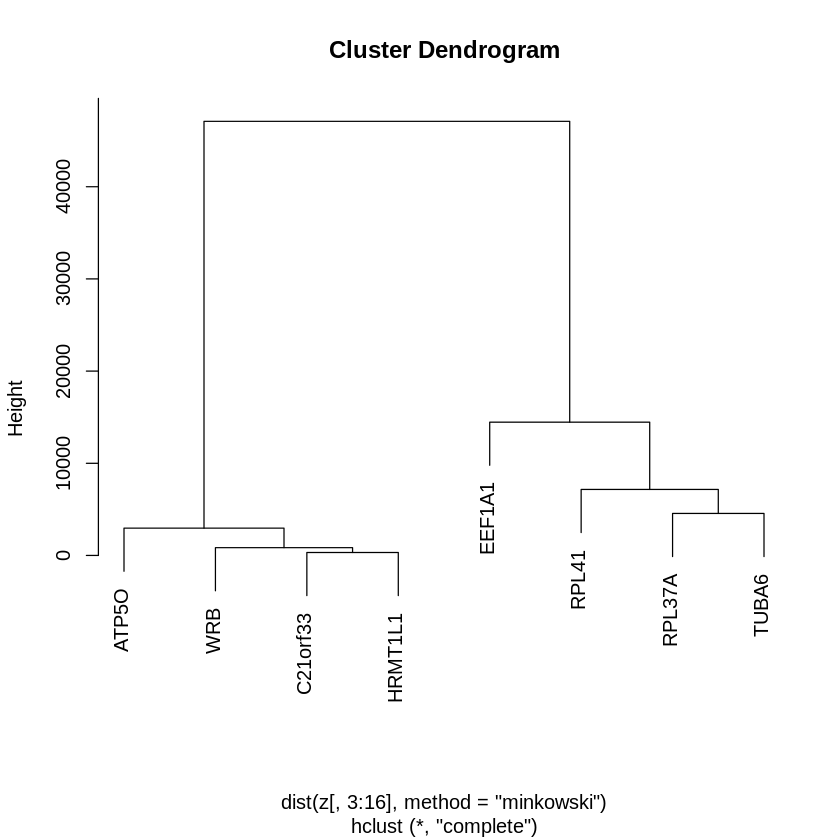

In [10]:
clust <- hclust(dist(z[,3:16],method="minkowski"),method="complete")
plot(clust)

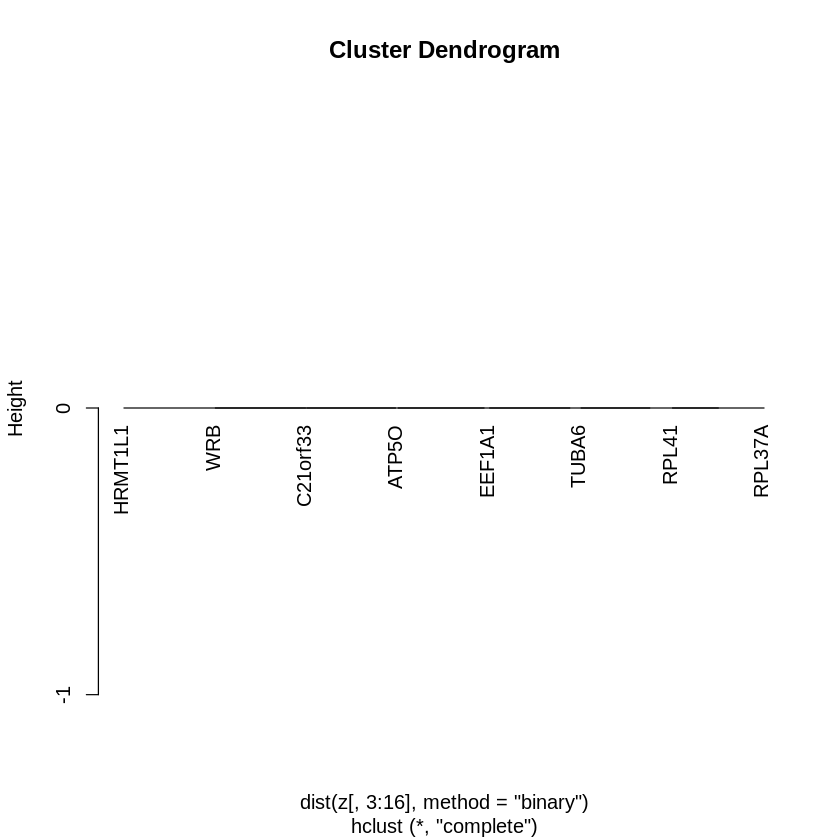

In [11]:
clust <- hclust(dist(z[,3:16],method="binary"),method="complete")
plot(clust)

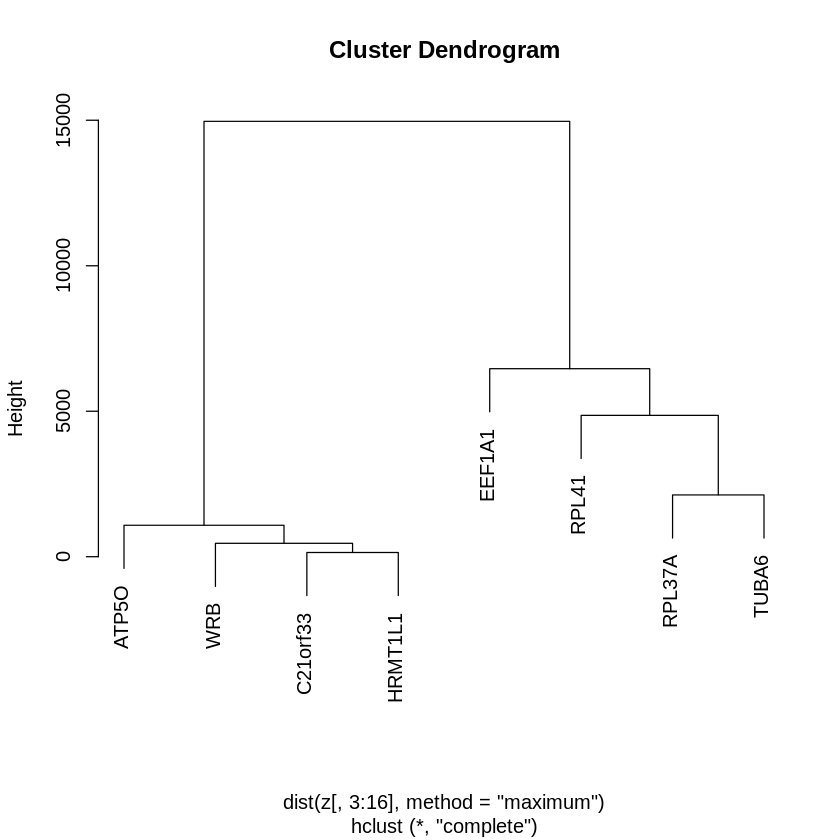

In [12]:
clust <- hclust(dist(z[,3:16],method="maximum"),method="complete")
plot(clust)

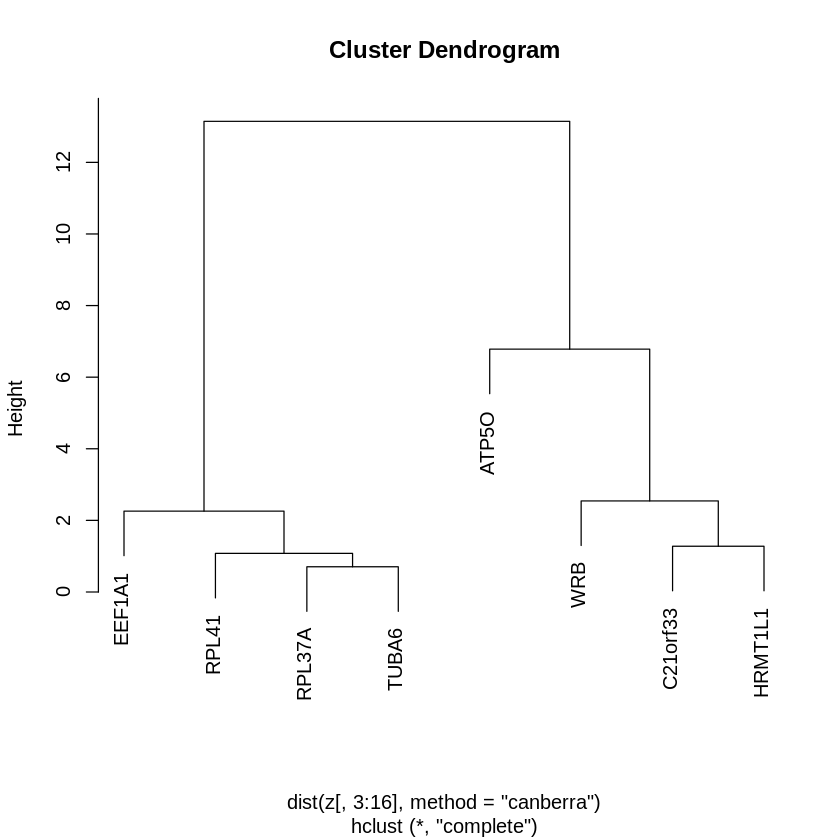

In [13]:
clust <- hclust(dist(z[,3:16],method="canberra"),method="complete")
plot(clust)

you can vary the metric by which you create the distance matrix
Euclidean, manhattan, minkowski, binary, maximum, canberra
as well as varying the clustering method
ward, single, complete, average, mcquitty, median or centroid

In [14]:
library(devtools)
install_github("genomicsclass/tissuesGeneExpression")
# or
# BiocManager::install("genomicsclass/tissuesGeneExpression")

Loading required package: usethis


Attaching package: ‘devtools’


The following object is masked from ‘package:rafalib’:

    install_bioc





── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpJvUi5r/remotesde2f2ab1ae/genomicsclass-tissuesGeneExpression-a43cf4b/DESCRIPTION’ ... OK
* preparing ‘tissuesGeneExpression’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* creating default NAMESPACE file
* building ‘tissuesGeneExpression_1.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [15]:
library(tissuesGeneExpression)
data(tissuesGeneExpression)

In [16]:
# distance between sample1 and sample10
sqrt(sum( (e[,1]-e[,10])^2 ) )

[1] 76.82249

# distance matrix of samples
distance between rows or samles (after transposing)

[1] "hclust"

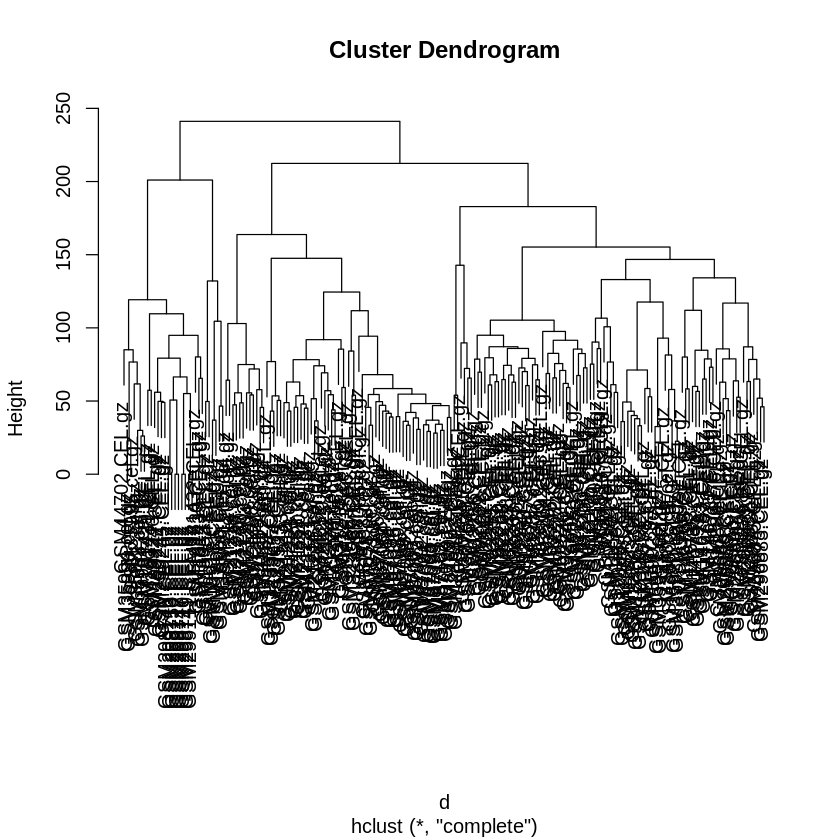

In [17]:
d <- dist( t(e) )  # only lower diagonal is stored
hc <- hclust(d)
class(hc)
plot(hc) # plot knows what to do

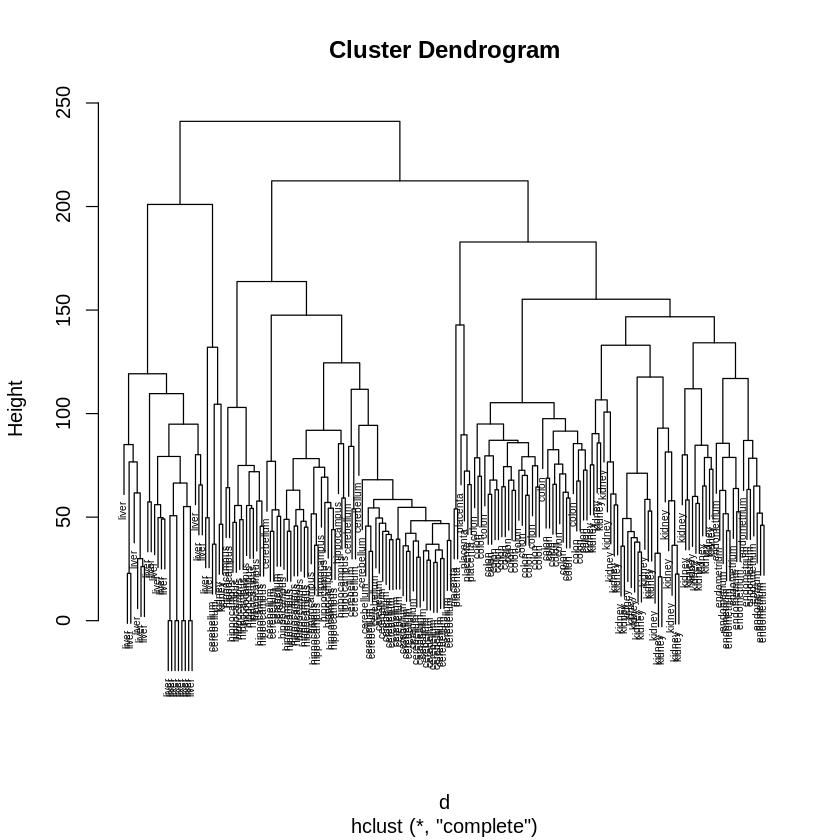

In [18]:
plot(hc, cex = 0.5, label = tissue) # hc traks the order of tissue

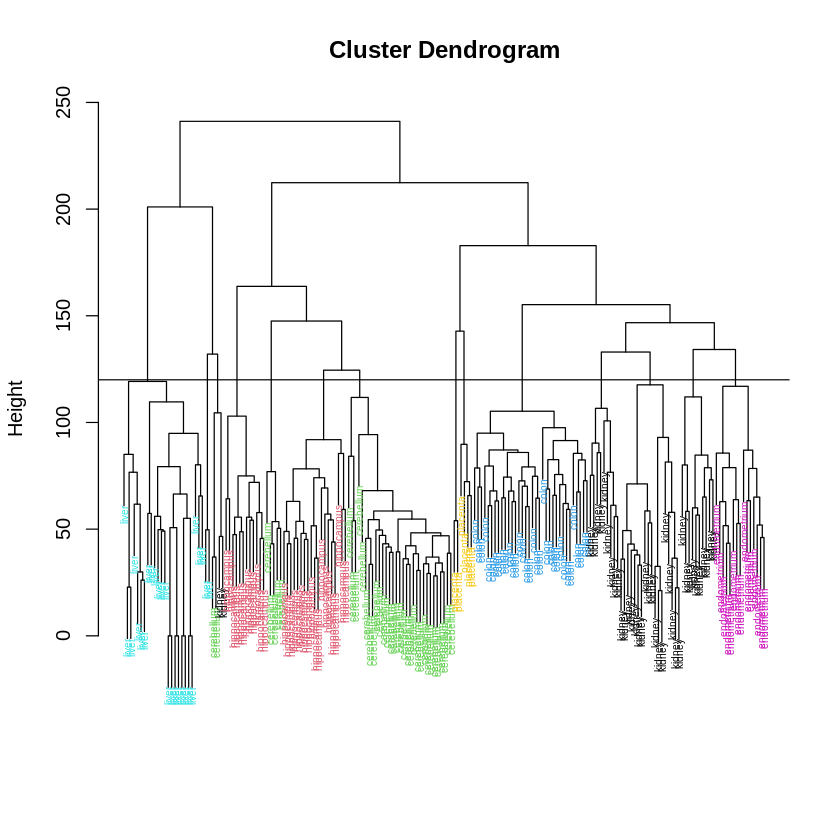

In [19]:
myplclust(hc, cex = 0.5, label = tissue, lab.col = as.fumeric(tissue))
abline(h = 120) # let us cut the tree at 120

Remember thsee are just groupings
if you want to create clusters using the groups
then you have to decide on a cut-off and then
group the tissues based on the groups from the cut-off

How do we decide on the cut off
the most distance I can move without any interference
that is where I want to cut

In [20]:
cl <- cutree(hc, h = 120)
table(tree=tissue, cluster=cl)

             cluster
tree           1  2  3  4  5  6  7  8  9 10 11 12 13 14
  cerebellum   0  0  0  0 31  0  0  0  2  0  0  5  0  0
  colon        0  0  0  0  0  0 34  0  0  0  0  0  0  0
  endometrium  0  0  0  0  0  0  0  0  0  0 15  0  0  0
  hippocampus  0  0 12 19  0  0  0  0  0  0  0  0  0  0
  kidney       9 18  0  0  0 10  0  0  2  0  0  0  0  0
  liver        0  0  0  0  0  0  0 24  0  2  0  0  0  0
  placenta     0  0  0  0  0  0  0  0  0  0  0  0  2  4

take a look at the table

Are we doing good with colon samples?
* what about liver
* what about kidney ?

# Quiz
which pair (7, 13) or (11,20) is farthest in distance?

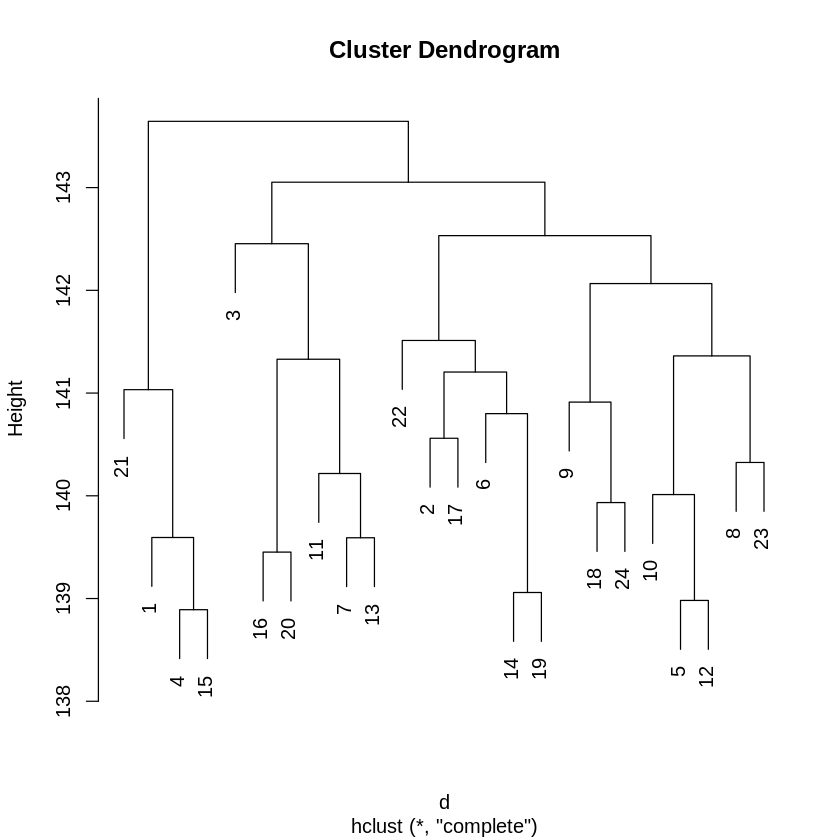

In [21]:
set.seed(100)
m <- 10000
n <- 24
data <- matrix(rnorm(m*n),m,n)
colnames(data) <- 1:n
d <- dist(t(data))
h <- hclust(d)
plot(h)

# k-means clustering

very easy to understand but not useful for biological data
  
we need to decide upfront how many clusters we need

then the algorithm then decides to put
which sample goes to which cluster

we pick 3 samles at ranodm we call this
3 centroids then look for close sample
then turn them into the corresponding cluster
redefine the cluster centroid and continue thsi
until there are no changes.

# Caveats:

KEEP in mind that there is a random component to this method

we do not know up-front how many clusters we expect

In [22]:
length(unique(tissue))
km <- kmeans( t(e), 7, centers = 7 )
table(tissue, clusters=km$cluster)

# what do you think about the result?

[1] 7

             clusters
tissue         1  2  3  4  5  6  7
  cerebellum   0 33  0  0  5  0  0
  colon        0  0 34  0  0  0  0
  endometrium  0  0  0 15  0  0  0
  hippocampus  0 31  0  0  0  0  0
  kidney      33  0  0  6  0  0  0
  liver        0  0  0  0  0  0 26
  placenta     0  0  0  0  0  6  0

In [23]:
km <- kmeans( t(e), 7, centers = 7 )
table(tissue, clusters=km$cluster)

             clusters
tissue         1  2  3  4  5  6  7
  cerebellum  33  0  0  0  0  0  5
  colon        0  0  0  0 34  0  0
  endometrium  0  0 15  0  0  0  0
  hippocampus  0  0  0  0  0  0 31
  kidney       0  0  7 30  0  2  0
  liver        0  0  0  0  0 26  0
  placenta     0  6  0  0  0  0  0

# Can we create a plot?
yes, we have to use the MDS method

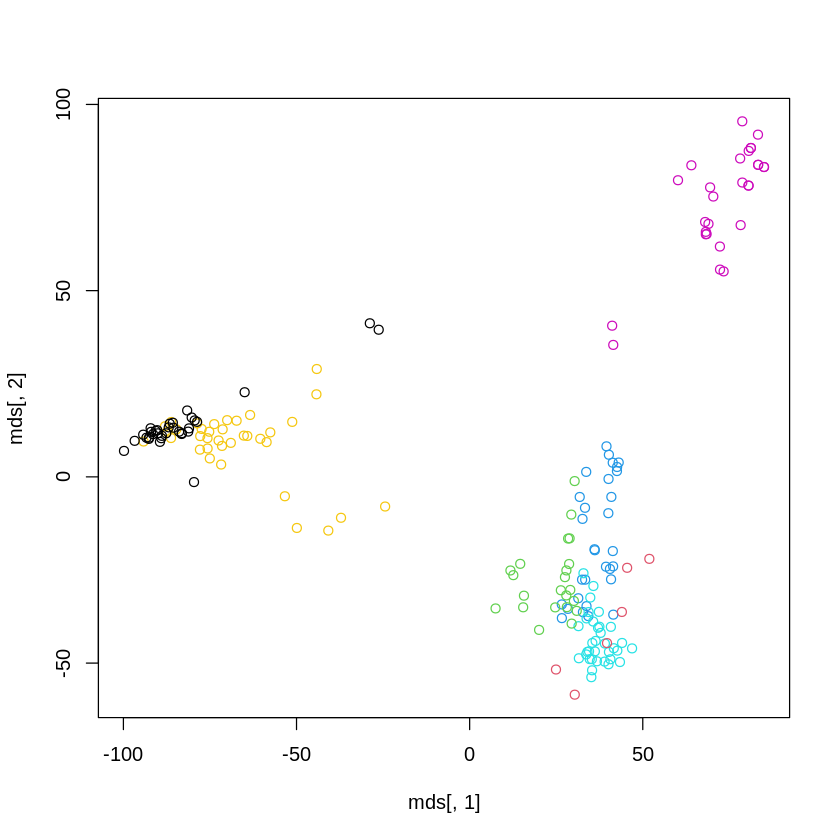

In [24]:
d <- dist( t(e) )
mds <- cmdscale( d )
plot(mds[,1], mds[,2], col=km$cluster)

In [25]:
# kmeans using one of the microarray data
library(devtools)
install_github("genomicsclass/GSE5859Subset")
library(GSE5859Subset)
data(GSE5859Subset)
set.seed(10)
km <- kmeans( t(geneExpression), 5, centers = 5 )
table(sampleInfo$date, km$cluster)
table(sampleInfo$group, km$cluster)

── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpJvUi5r/remotesde14bee4bf/genomicsclass-GSE5859Subset-8ada5f4/DESCRIPTION’ ... OK
* preparing ‘GSE5859Subset’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* creating default NAMESPACE file
* building ‘GSE5859Subset_1.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



            
             1 2 3 4 5
  2005-06-10 1 0 0 0 0
  2005-06-23 0 0 0 6 0
  2005-06-27 0 0 0 5 0
  2005-10-07 0 2 5 0 3
  2005-10-28 0 2 0 0 0

   
    1 2 3 4 5
  0 1 0 2 8 1
  1 0 4 3 3 2

In [26]:
#  Head Map
library(devtools)
#install_github("genomicsclass/tissuesGeneExpression")
library(tissuesGeneExpression)
data(tissuesGeneExpression)

## Heat map adds structure to the data
it takes the data and clusters the gene and then it clustes the sample then it adds color yellow means high and red means low
Why
Becos, every pixel correspond to an entry in the table. we dont want to use all the rows

[1] 22215   189

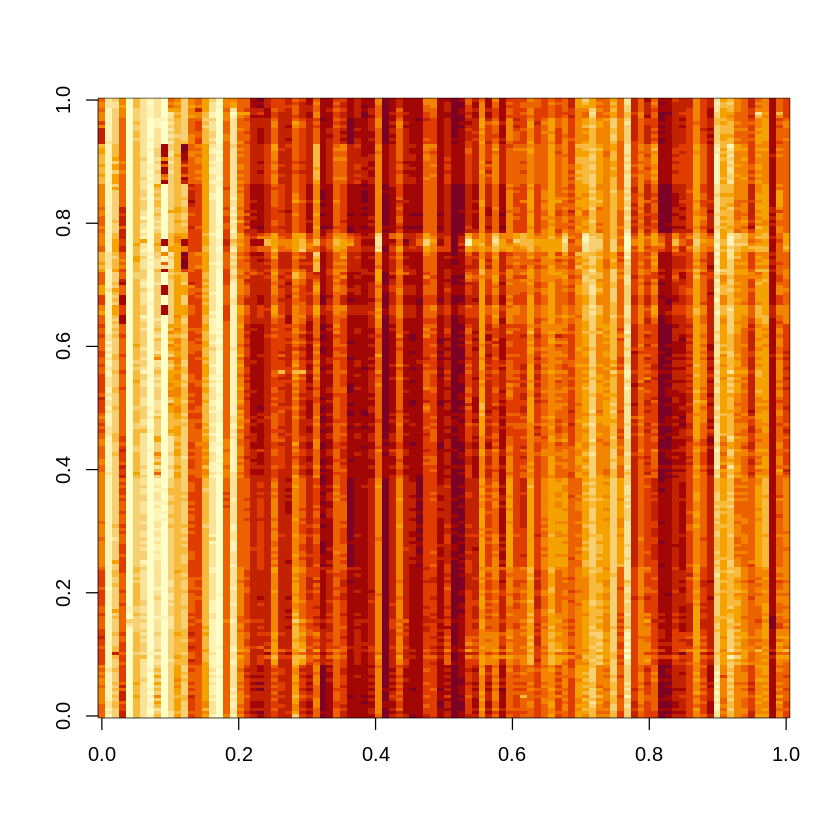

In [27]:
dim(e)
# 22215 x 189
# so let us use the first 100 genes

image( e[1:100,] )

In [28]:
# 8 minutes ** Time Consuming **
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("genefilter")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.3 (2024-02-29)

Installing package(s) 'BiocVersion', 'genefilter'

also installing the dependencies ‘bitops’, ‘zlibbioc’, ‘RCurl’, ‘GenomeInfoDbData’, ‘XVector’, ‘GenomeInfoDb’, ‘plogr’, ‘png’, ‘Biostrings’, ‘matrixStats’, ‘BiocGenerics’, ‘IRanges’, ‘RSQLite’, ‘S4Vectors’, ‘KEGGREST’, ‘XML’, ‘xtable’, ‘MatrixGenerics’, ‘AnnotationDbi’, ‘annotate’, ‘Biobase’


Old packages: 'bit', 'bslib', 'callr', 'curl', 'data.table', 'DBI', 'dbplyr',
  'devtools', 'digest', 'gargle', 'ggplot2', 'gh', 'highr', 'htmltools',
  'httr2', 'isoband', 'knitr', 'munsell', 'openssl', 'pkgbuild', 'processx',
  'ragg', 'remotes', 'rmarkdown', 'rstudioapi', 'rvest', 'sass', 'systemfonts',

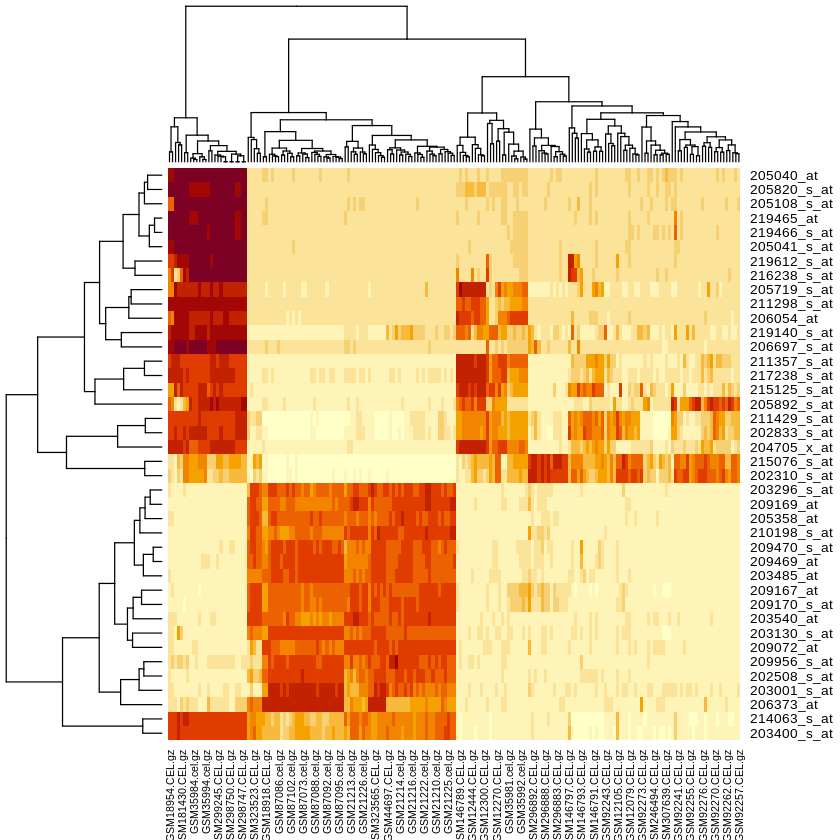

In [29]:
library(genefilter)
rv <- genefilter::rowVars(e)
idx <- order(-rv)[1:40]
heatmap(e[idx,])

In [30]:
# let us improve the color
install.packages("RColorBrewer")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



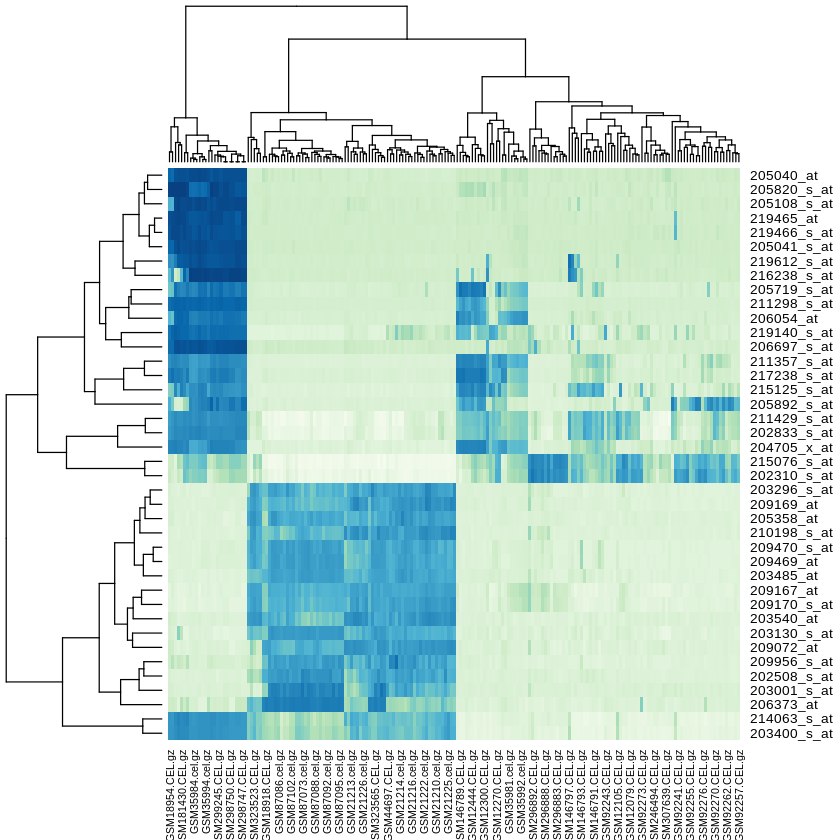

In [31]:
library(RColorBrewer)
hmcol <- colorRampPalette(brewer.pal(9,"GnBu"))(100)
heatmap(e[idx,],col=hmcol) # low is whie and high expr is blue
# use heatmap2 instead


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gtools’, ‘caTools’



Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




,tissue,cols
GSM11805.CEL.gz,kidney,black
GSM11814.CEL.gz,kidney,black
GSM11823.CEL.gz,kidney,black
GSM11830.CEL.gz,kidney,black
GSM12067.CEL.gz,kidney,black
GSM12075.CEL.gz,kidney,black
GSM12079.CEL.gz,kidney,black
GSM12098.CEL.gz,kidney,black
GSM12105.CEL.gz,kidney,black
GSM12268.CEL.gz,kidney,black


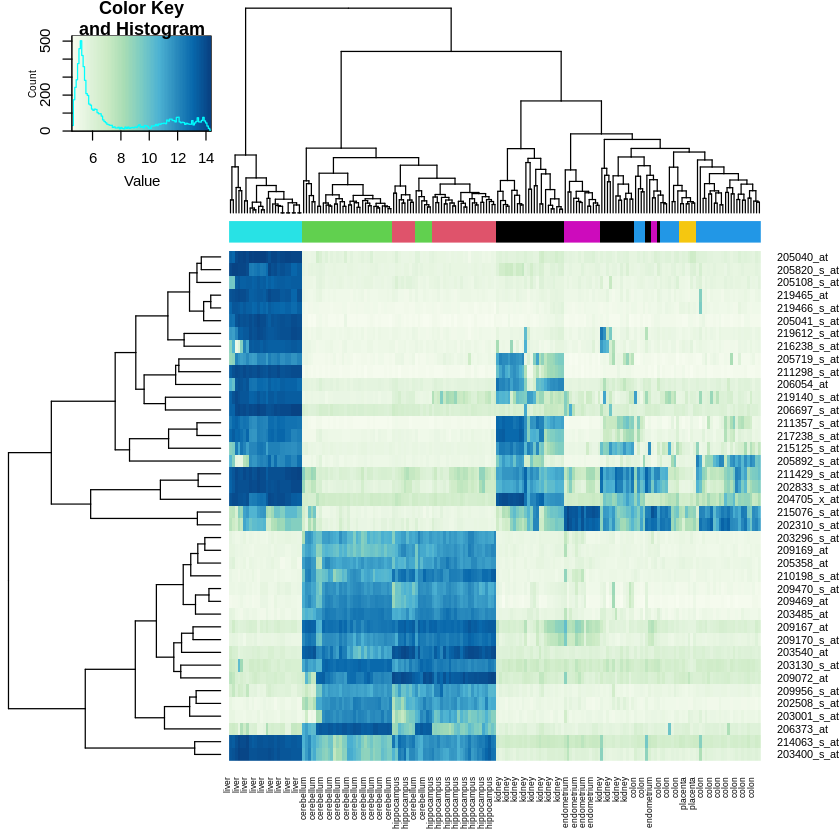

In [32]:
install.packages("gplots")

library(gplots)
library(rafalib)
cols <- palette(brewer.pal(7,"Dark2"))[as.fumeric(tissue)]
cbind(colnames(e),tissue,cols)
heatmap.2(e[idx,], labCol=tissue, trace = "none",
          ColSideColors = cols,
          col = hmcol)

# So far we have always looked at sample clustering
can we cluster gene

In [33]:
set.seed(1)
m <- 10000
n <- 24
B <- 100
cl <- vector("numeric",B)
test <- for (i in 1:B) {
  x = matrix(rnorm(m*n),m,n)
  hc <- hclust( dist(t(x)) )
  cl[i] <- max(cutree(hc, h = 143))

}
cl
sd(cl)/sqrt(23)


[1] 4 3 2 4 4 4 4 5 4 3 4 3 3 5 4 4 5 4 5 3 4 4 3 4 4 3 3 2 4 4 6 4 3 4 5 5 3
 [38] 3 4 5 3 3 5 4 4 5 4 4 5 2 4 3 4 4 5 4 4 4 5 5 4 5 3 4 4 3 3 4 3 3 3 3 5 5
 [75] 5 4 4 2 4 3 4 3 3 4 2 3 3 4 3 4 5 3 4 4 5 6 4 1 4 4

[1] 0.1883288

Finally, note that clustering involves computing
distances and distances are very susceptible to noise


In [34]:
session_info()

,package,ondiskversion,loadedversion,path,loadedpath,attached,is_base,date,source,md5ok,library
,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>,<lgl>,<fct>
annotate,annotate,1.80.0,1.80.0,/usr/local/lib/R/site-library/annotate,/usr/local/lib/R/site-library/annotate,FALSE,FALSE,2023-10-24,Bioconductor,NA,/usr/local/lib/R/site-library
AnnotationDbi,AnnotationDbi,1.64.1,1.64.1,/usr/local/lib/R/site-library/AnnotationDbi,/usr/local/lib/R/site-library/AnnotationDbi,FALSE,FALSE,2023-11-03,Bioconductor,NA,/usr/local/lib/R/site-library
base64enc,base64enc,0.1.3,0.1-3,/usr/lib/R/site-library/base64enc,/usr/lib/R/site-library/base64enc,FALSE,FALSE,2015-07-28,CRAN (R 4.0.2),NA,/usr/lib/R/site-library
Biobase,Biobase,2.62.0,2.62.0,/usr/local/lib/R/site-library/Biobase,/usr/local/lib/R/site-library/Biobase,FALSE,FALSE,2023-10-24,Bioconductor,NA,/usr/local/lib/R/site-library
BiocGenerics,BiocGenerics,0.48.1,0.48.1,/usr/local/lib/R/site-library/BiocGenerics,/usr/local/lib/R/site-library/BiocGenerics,FALSE,FALSE,2023-11-01,Bioconductor,NA,/usr/local/lib/R/site-library
BiocManager,BiocManager,1.30.22,1.30.22,/usr/local/lib/R/site-library/BiocManager,/usr/local/lib/R/site-library/BiocManager,FALSE,FALSE,2023-08-08,CRAN (R 4.3.3),NA,/usr/local/lib/R/site-library
Biostrings,Biostrings,2.70.3,2.70.3,/usr/local/lib/R/site-library/Biostrings,/usr/local/lib/R/site-library/Biostrings,FALSE,FALSE,2024-03-13,Bioconductor 3.18 (R 4.3.3),NA,/usr/local/lib/R/site-library
bit,bit,4.0.4,4.0.4,/usr/lib/R/site-library/bit,/usr/lib/R/site-library/bit,FALSE,FALSE,2020-08-04,CRAN (R 4.0.2),NA,/usr/lib/R/site-library
bit64,bit64,4.0.5,4.0.5,/usr/lib/R/site-library/bit64,/usr/lib/R/site-library/bit64,FALSE,FALSE,2020-08-30,CRAN (R 4.2.0),NA,/usr/lib/R/site-library
